A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [1]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [2]:
class TSTNode:
    def __init__(self, char):
        self.char = char
        self.last_char_in_string = False
        self.less_than = None
        self.equals = None
        self.larger_than = None

    def _insert(self, string):
        char = string[0]

        if char < self.char:
            if self.less_than is None:
                self.less_than = TSTNode(char)
            self.less_than._insert(string)
        elif char > self.char:
            if self.larger_than is None:
                self.larger_than = TSTNode(char)
            self.larger_than._insert(string)
        elif len(string) > 1:
            if self.equals is None:
                self.equals = TSTNode(string[1])
            self.equals._insert(string[1:])
        else:
            self.last_char_in_string = True

    def _search(self, string):
        char = string[0]

        if char < self.char:
            return self.less_than._search(string) if self.less_than else False
        elif char > self.char:
            return self.larger_than._search(string) if self.larger_than else False
        elif len(string) > 1:
            return self.equals._search(string[1:]) if self.equals else False
        else:
            return self.last_char_in_string

    def _all_strings(self, prefix=""):
        strings = []
        if self.last_char_in_string:
            strings.append(prefix + self.char)
        if self.less_than:
            strings.extend(self.less_than._all_strings(prefix))
        if self.equals:
            strings.extend(self.equals._all_strings(prefix + self.char))
        if self.larger_than:
            strings.extend(self.larger_than._all_strings(prefix))
        return strings

    def __len__(self):
        length = 1 if self.last_char_in_string else 0
        if self.less_than:
            length += len(self.less_than)
        if self.equals:
            length += len(self.equals)
        if self.larger_than:
            length += len(self.larger_than)
        return length

    def _to_string(self, indent=''):
        repr_str = indent + repr(self.char) + ("*" if self.last_char_in_string else "")
        if self.equals:
            repr_str += '\n' + self.equals._to_string(indent + '  ')
        if self.less_than:
            repr_str += '\n' + self.less_than._to_string(indent + '  ')
        if self.larger_than:
            repr_str += '\n' + self.larger_than._to_string(indent + '  ')
        return repr_str



In [3]:
class TernarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, string):
        if not self.root:
            self.root = TSTNode(string[0])
        self.root._insert(string)

    def search(self, string):
        return self.root._search(string) if self.root else False

    def prefix_search(self, prefix):
        results = []
        if not prefix:  # Check if prefix is empty
            node = self.root
        else:
            node = self._search_prefix_node(self.root, prefix, 0)
        if node:
            self._collect_strings(node, prefix, results)
        return results

    def _search_prefix_node(self, node, prefix, index):
            if not node:
                return None

            char = prefix[index]
            if char < node.char:
                return self._search_prefix_node(node.less_than, prefix, index)
            elif char > node.char:
                return self._search_prefix_node(node.larger_than, prefix, index)
            elif index < len(prefix) - 1:
                return self._search_prefix_node(node.equals, prefix, index + 1)
            else:
                return node

    def _collect_strings(self, node, prefix, results):
        if node.last_char_in_string:
            results.append(prefix + node.char)

        if node.less_than:
            self._collect_strings(node.less_than, prefix, results)
        if node.equals:
            self._collect_strings(node.equals, prefix + node.char, results)
        if node.larger_than:
            self._collect_strings(node.larger_than, prefix, results)

    def count_strings(self):
        return len(self)  # Uses the __len__ method

    def all_strings(self):
        return self.prefix_search("")

    def __len__(self):
        return len(self.root) if self.root else 0

    def __repr__(self):
        return self.root._to_string() if self.root else 'empty tree'

# Example usage

Create a new empty ternery search tree.

In [4]:
tst = TernarySearchTree()

Insert the string into the tree.

In [5]:
tst.insert('appple')
tst.insert('banana')

In [6]:
print(tst)

'a'
  'p'
    'p'
      'p'
        'l'
          'e'*
  'b'
    'a'
      'n'
        'a'
          'n'
            'a'*


The tree should now contain two strings.

In [7]:
print(len(tst))

2


In [8]:
print(tst.all_strings())

['appple', 'banana']


Search for the string `'ba'`, it should be found since it is a prefix of `'banana'`.

In [9]:
print(tst.prefix_search('ba'))

['baanana']


The string `'ac'` should not be found.

In [10]:
print(tst.prefix_search('ac'))

[]


In [11]:
print(len(tst))

2


In [12]:
print(tst)

'a'
  'p'
    'p'
      'p'
        'l'
          'e'*
  'b'
    'a'
      'n'
        'a'
          'n'
            'a'*


In [13]:
print(tst.all_strings())

['appple', 'banana']


# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [17]:
tst = TernarySearchTree()
with open('/Users/Admin/Downloads/project/data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [18]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [19]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [20]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.prefix_search(prefix), f'{prefix} not found'

Chack that when searching for a exact match, only the inserted words are found, and no prefixes.

In [21]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix), \
                   f'{prefix} found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [22]:
with open('/Users/Admin/Downloads/project/data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [23]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

In [24]:
# Test prefix string search
prefix_results = tst.prefix_search("app")
print("Prefix search results:", prefix_results)
assert "banana" not in prefix_results
assert "apricot" not in prefix_results

# Print success message if all tests pass
print("All tests passed!")

Prefix search results: []
All tests passed!


# Performance

Benchmark the scaling behaviour of the implementation

In [25]:
with open('/Users/Admin/Downloads/project/data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

To assess the performance, i.e., the time it takes to insert a new string or search the ternary tree as a function of the tree's size, we need a large dataset.  This is provided in `data/search_trees/corncob_lowercase.txt`.  This file contains over 58,000 English words, all lower case.

In [26]:
print(len(words))

58110


In [27]:
words[:20]

['aardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abase',
 'abased',
 'abasement',
 'abash',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abates']

We will select random samples of increasing sizes from the list.

In [28]:
import random
import time
import matplotlib.pyplot as plt

In [29]:
sample_size = 400
reduced_words = random.sample(words, k=sample_size)

sizes = [50,100,200,300]
samples = [
    random.sample(reduced_words, k=size) for size in sizes
]

To measure the insertion time of words into a ternary search tree for different sample sizes. By varying the sample sizes, you can analyze how the performance of the ternary search tree changes as the number of words being inserted increases. This allows you to understand how efficiently the tree structure handles larger datasets and how insertion time scales with the size of the dataset. 

In [31]:
import time
import random

nr_runs = 2  # Number of runs for more accurate measurements
times = {}
insert_sample = random.sample(words, k=5)  

for sample_size in range(1, 6):  
    tst = TernarySearchTree()
    sample = random.sample(words, k=sample_size)
    
    for word in sample:
        tst.insert(word) 
    
    times[sample_size] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)  
        end_time = time.time_ns()
        times[sample_size] += end_time - start_time
    
    times[sample_size] /= nr_runs * 1000000.0  # Convert to milliseconds

print(times)


{1: 214.7349, 2: 519.47115, 3: 1009.86155, 4: 524.4728, 5: 1225.2953}


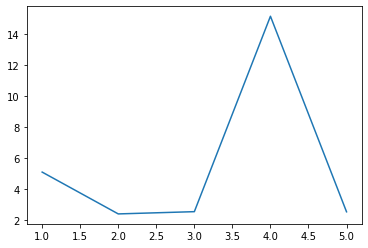

In [30]:
plt.plot(times.keys(), times.values());

This code is to measure the insertion time of words into a ternary search tree for different sample sizes. By varying the sample sizes, you can analyze how the performance of the ternary search tree changes as the number of words being inserted increases. This allows you to understand how efficiently the tree structure handles larger datasets and how insertion time scales with the size of the dataset. The resulting plot visually demonstrates the relationship between sample size and insertion time.

We can do the same for searching words in a T-tree of various sizes.

In [39]:
nr_runs = 2
times = {}
  
search_sample = random.sample(words, k=5)
for sample_size in samples:  
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)  
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    
    times[len(sample)] /= nr_runs * 1_000_000.0  # Convert to milliseconds

print(times)


{5: 65.3418}


# Discussion  of the expected complexity 

The insertion operation in a Ternary Search Tree involves recursively traversing the tree to find the appropriate position for the new string. If the current node doesn't exist, it's created. This operation has a time complexity 

similary The search operation in a TST also involves traversing the tree in a manner similar to insertion. The search either finds the target string or reaches a null node if the string is not present. Just like insertion, the time complexity of search is also O(H).If the TST is well-balanced,operations like insertion and search will be efficient, with a time complexity of O(log N) where N is the number of distinct strings.

The all_strings operation, which involves visiting all nodes in the tree, will have a time complexity of O(M), where M is the total number of characters across all strings. This operation can be relatively slow if there are a large number of strings with many characters.